## Técnincas de Pré-processamento

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# abrir arquivo csv que contem os dados a serem utilizados
customers = pd.read_csv('Dataset/Mall_Customers.csv')

In [28]:
# visualizando as 5 primeiras linhas do Dataframe
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# info do Dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
# verificando a existencia de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
# adicionando valores null
customers_null = customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac = 0.1).index, col] = np.nan

customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [32]:
customers_null.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,NaN,NaN,NaN,81.0
2,NaN,Female,20.0,16.0,6.0
3,4.0,NaN,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
5,6.0,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,6.0
7,8.0,Female,23.0,18.0,94.0
8,9.0,Male,64.0,19.0,3.0
9,10.0,Female,30.0,19.0,72.0


In [33]:
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [59]:
# deletando as linhas NAN do Dataframe
customers_null.dropna()
customers.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
4,5.0,Female,31.0,17.0,40.0
5,6.0,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,6.0
7,8.0,Female,23.0,18.0,94.0
...,...,...,...,...,...
188,189.0,Female,41.0,103.0,17.0
194,195.0,Female,47.0,120.0,16.0
195,196.0,Female,35.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0


In [37]:
# prencher os valores null pelo valor zero
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,0,0.0,0.0,81.0
2,0.0,Female,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,0,32.0,126.0,74.0
198,199.0,Male,32.0,137.0,18.0


In [38]:
# verifica a estatisca do Dataframe
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,97.538889,38.311111,60.588889,50.955556
std,57.477065,13.801178,25.939291,25.553279
min,1.000000,18.000000,15.000000,1.000000
25%,47.750000,28.000000,42.750000,35.000000
50%,96.500000,35.000000,62.000000,50.000000
75%,145.250000,48.000000,78.000000,73.000000
max,199.000000,70.000000,137.000000,99.000000


In [40]:
# preenchendo os valores null pela média da coluna
customers_null.fillna(customers.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.000000,15.000000,39.0
1,2.000000,NaN,38.311111,60.588889,81.0
2,97.538889,Female,20.000000,16.000000,6.0
3,4.000000,NaN,23.000000,16.000000,77.0
4,5.000000,Female,31.000000,17.000000,40.0
...,...,...,...,...,...
195,196.000000,Female,35.000000,120.000000,79.0
196,197.000000,Female,45.000000,126.000000,28.0
197,198.000000,NaN,32.000000,126.000000,74.0
198,199.000000,Male,32.000000,137.000000,18.0


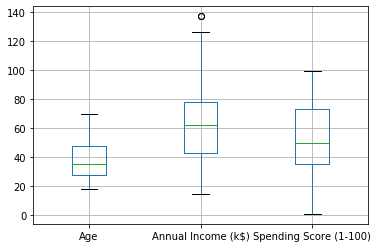

In [42]:
# verificando a existencia de outliers(anomalias) nos dados. Utilizando o BoxPlot
# A bola significa um possivel Outlier
boxplot = customers_null.boxplot(column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [48]:
# verificando a existencia de outliers(anomalias) nos dados. Usando Z-Score
from scipy import stats
z = np.abs(stats.zscore(customers_null['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

df_salario_outliers = customers_null.iloc[result[0]]

df_salario_outliers #Não existe nenhum outliers por o calculo do zscore não retornou nenhum caso

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Text(0.5, 1.0, 'Distribuição dos Clientes por Genero')

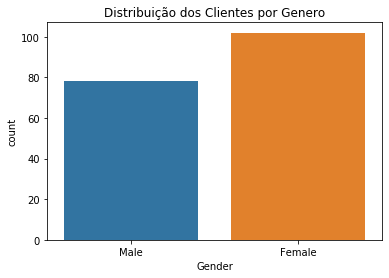

In [52]:
# Analisando a distribuição dos clientes por genero
sns.countplot(x = 'Gender', data = customers_null) #cria grafico que conta a qtde de consumidores existentes em cada um dos generos
plt.title('Distribuição dos Clientes por Genero')

Text(0.5, 0, 'Idade')

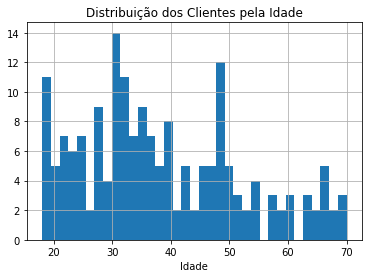

In [76]:
# Analisando a distribuição por idade
customers.hist('Age', bins = 35) # seleciona a coluna Idade para criar o histograma. Os bins indicam a qtde de grupos que se deseja dividir os dados
plt.title('Distribuição dos Clientes pela Idade') # defini o titulo para o grafico de histograma
plt.xlabel('Idade')

In [75]:
# Aplicando Codificação dos dados
# Copiando as colunas que são do tipo categoria
cat_df_customers = customers.select_dtypes(include = ['object'])
cat_df_customers.head()

,Gender
0,Male
2,Female
4,Female
5,Female
6,Female


In [82]:
# Aplicando o Mapeamento
replace_map = {'Gender' : {'Male' : 1, 'Female' : 2}} # define o dicionario a ser utilizado no map
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist() # encontra a lista de variaveis categoricas
replace_map_comp = {'Gender' : {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}} # define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [83]:
# realiza a copia do Dataset
cat_df_customers_replace = pd.read_csv('Dataset/Mall_Customers.csv')

In [84]:
# aplica o mapeamento para o dataset
cat_df_customers_replace.replace(replace_map_comp, inplace = True)
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [90]:
# Aplicando o Label Encoding da Colune Gender, onde trocamos o Male/Female por Códigos 0/1
customers = pd.read_csv('Dataset/Mall_Customers.csv')

In [91]:
cat_df_customers_lc = customers

In [92]:
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [93]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [95]:
# One Hot Encoding
customers_one_hot = pd.read_csv('Dataset/Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
